<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Normalizacion_vertical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalización de señales vertical

Jose Luis López Elvira ([enlace a más recursos en GitHub](https://github.com/joselvira/BiomecanicaPython))

Última modificación 26/05/2025

Muchas veces resulta necesario normalizar los valores de las series temporales que medimos. Normalizar se refiere a la modificación de toda la serie temporal para hacerla **proporcional** a un valor de referencia de la propia variable. Podemos llamarlo **normalización vertical** porque usamos como referencia la propia variable que se mide, que normalmente se representa en el eje vertical en una gráfica, siendo el eje horizontal el tiempo.

Por ejemplo, cuando medimos datos de **fuerza en saltos** es conveniente normalizar respecto al peso de la persona porque el peso es una fuerza que se suma a la que realiza la persona al saltar, pero que no depende de sus cualidades físicas. Una persona con más peso registra valores de fuerza mayores pero sin hacer ningún mérito. Normalizando respecto al peso nos aseguramos de igualar a todas las personas independientemente de su peso.

Otro caso frecuente de necesidad de normalización es cuando medimos **electromiografía** (EMG) en distintos músculos y queremos comparar sus niveles de activación. Por las características de la EMG, lo que se mide en cada músculo puede estar contaminado por muchas cosas, como la capa de grasa desde el músculo a los electrodos, etc. Para poder comparar la actividad de los músculos con garantías debemos expresar su nivel de activación respecto a un valor de referencia, normalmente se usa la máxima activación que puede realizar ese músculo. Con frecuencia se mide realizando ejercicios isométricos específicos para cada músculo para garantizar que se obtiene la máxima activación de cada uno, y se usan esos valores como referencia para normalizar.

Vemos algunos ejemplos. Como siempre, empezamos cargando librerías básicas.


In [3]:
import numpy as np #tipo de datos Numpy
import pandas as pd #tipo de datos Pandas
import matplotlib.pyplot as plt #librería básica para representar gráficas

Cargamos un archivo de salto vertical cualquiera y lo representamos la fuerza en el eje vertical.

<Axes: >

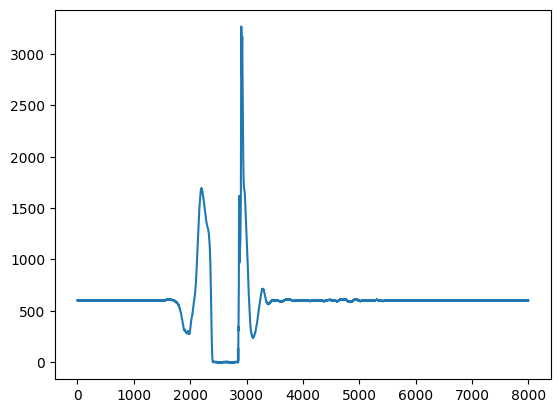

In [4]:
# Carga archivo
nom_arch_salto = 'https://raw.githubusercontent.com/joselvira/BiomecanicaPython/master/Datos/PlatFuerzas/Saltos/BiowareSaltos-5.txt' #archivo con el registro de las fuerzas en un salto.
dfDatos = pd.read_csv(nom_arch_salto, header=17, skiprows=[18], sep='\t')

# Crea una gráfica de la fuerza vertical
dfDatos['Fz'].plot()


Podríamos normalizar esos datos a cualquier valor, por ejemplo, vamos a probar con el máximo.

<Axes: >

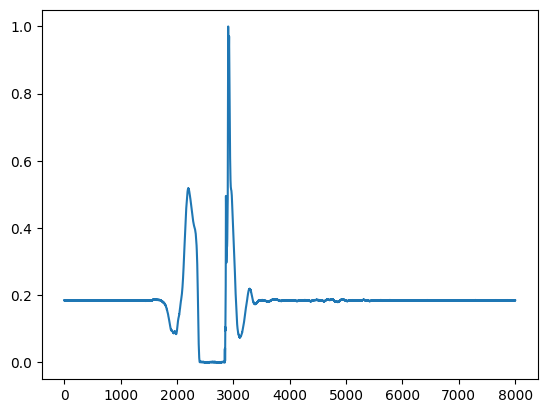

In [5]:
maximo = dfDatos['Fz'].max()
dfDatos['Fz_norm'] = dfDatos['Fz']/maximo
dfDatos['Fz_norm'].plot()

Vemos que la gráfica sigue el mismo perfil, lo único que ha cambiado es la escala del eje Y. concretamente, vemos que el **máximo de fuerza en todo el salto toma el valor 1** y el resto de datos se ajustan proporcionalmente.

Pero en este caso esta normalización no tiene sentido, como decíamos antes, nos interesa normalizar respecto al peso. No sabemos el peso de la persona que hizo este salto, pero por suerte lo podemos medir en la propia gráfica. Basta con tomar un tramo del registro en el que sepamos que no se está moviendo y hacer la media. Sabemos que al principio del salto y al final la persona está quieta, por lo tanto la plataforma mide justamente su peso.

Tomamos una ventana de tiempo en la columna de datos de fuerza vertical, por ejemplo desde el dato 500 al 1000, y calculamos el promedio para obtener el peso.

In [6]:
peso = dfDatos['Fz'].iloc[500:1000].mean()
print(f'El peso es: {peso} N')

El peso es: 600.890380138 N


Y una vez tenemos el peso, hacemos todos los datos de fuerza proporcionales a ese valor, es decir, normalizamos respecto al peso.

<Axes: >

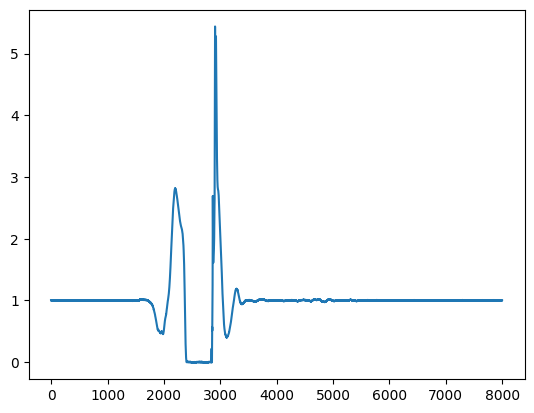

In [ ]:
dfDatos['Fz_norm'] = dfDatos['Fz']/peso
dfDatos['Fz_norm'].plot()

Ahora vemos que las partes de la gráfica en las que la persona está inmóvil (que corresponden a su peso) tienen el valor 1, y el resto de datos son proporcionales a él. Por ejemplo, podemos ver que la máxima fuerza que realiza en la batida son casi 3 veces su peso, mientras que la fuerza en la cáida son más de 5 veces su peso.

Si queres saber más detalles sobre el análisis de las fuerzas en el salto vertical, puedes consultar [este enlace a un cuaderno colab](https://colab.research.google.com/drive/1OuHLXhWZuCW878Xjimg7mdzanl7p5g7Q#scrollTo=h9dZ8J0WBbhh).

En resumen, normalizar consiste básicamente en cambiar la escala de la variable manteniendo su perfil. Fíjate en la siguiente gráfica. En la escala de la izquierda se muestra la escala original en newtons, mientras que en la escala de la derecha se muestra la escala normalizada respecto al peso, pero el perfil de fuerzas del salto es el mismo.

Text(0, 0.5, 'Fz normalizada')

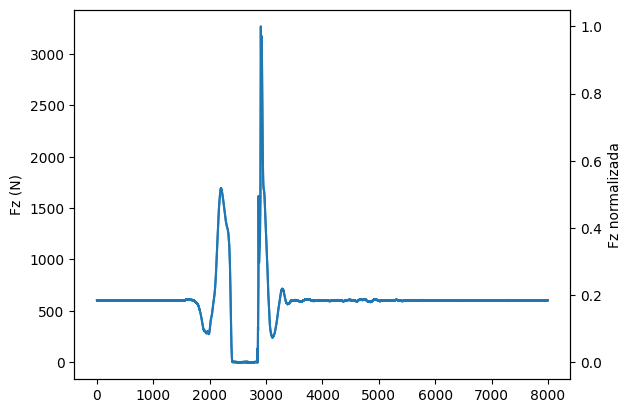

In [11]:

fig, ax = plt.subplots()
ax.plot(dfDatos['Fz'])

ax2 = ax.twinx() #crea el segundo eje
ax2.plot(dfDatos['Fz_norm']) # muestra la fuerza normalizada en el 2º eje
ax.set_ylabel('Fz (N)')
ax2.set_ylabel('Fz normalizada')